# Keras, TensorFlow, MNIST  and Machine Learning

<img src="data/notebook_img/keras_and_tensorFlow.png" width="400" align="center"/>


## TensorFlow 
Tensorflow is a free and open-source platform used for numerical computation and machine learning, such as building neural networks. It was developed by Google and they use it for both research and production. Many acclaimed companies use TessorFlow for large and complex projects, such as classifying images, detecting objects, faster and more refined search and more. TensorFlow can run on multiple CPUs and GPUs and its flexible architecture allows for an easy deployment of computation across various operating systems(Linux, macOS and Windows) and mobile operating systems(Android and iOS). 

Tensorflow offers multiple levels of abstractions for building, training and deploying models. Model is represented as a data flow graph. The graph contains a set of nodes(operations) that are connected to each other inside the graph. Operations are units of computation and represent a mathematical operation. Each operation takes in tensor as input and output to tensor as well. Tensor is how the data is represented in tensorflow. They are multi-dimensional arrays of numbers that flow between operations.

# Keras
Keras is a high-level and open-source neural-network API, written in Python and capable of running on top of TensorFlow. It is an interface rather than a standalone machine learning framework. It was created to be user friendly and "designed for human beings, not machines". Keras API simplifies working with TensorFlow over TensorFlow Core API that requires computational graphs, tensors, operations, and sessions that can be quite complex and harder to understand. Keras models are made by connecting configurable modules(neural layers, cost functions, optimizers, initialization schemes, activation functions and regularization schemes) together with as few restrictions as possible. New modules are simple to add, as new classes and functions. Models are described in Python code, not separate model configuration files. When importing Keras to Jupyter notebook, it will return "Using TensorFlow backend".

# MNIST
Modified National Institute of Standards and Technology, or MNIST, is a subset of images constructed from a variety of scanned documents (American Census Bureau employees and American high school students), available from the larger [NIST](https://en.wikipedia.org/wiki/National_Institute_of_Standards_and_Technology) set. It is commonly used for image classification, evaluating and comparing models in the field of machine learning.

MNIST contains 60,000 training and 10,000 testing black and white images. It is a set of handwritten single digits between 0 and 9, or 10 classes to clasify. The images are centered, normalised to fit into a 28x28 pixel bounding box(784 pixels in total) and anti-aliased, which introduced grayscale levels. Each image also contains an identifying label. 

Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API. MNIST is an useful starting point for developing and practicing a methodology for solving image classification tasks using convolutional neural networks(CNN).

# Machine Learning

### Neurons 
Neurons are building blocks of a neural network. Neuron receives an input, processes it and generates an output. The output is either sent to other neurons for further processing or it is the final output. The neurons have their weights and biases that are assigned randomly. They are variables in the model that are updated during the network training. The <b>activation function(f)</b> puts a nonlinear transformation to the linear combination which then generates the output. It translates the input signals to output signals. 

<img src="data/notebook_img/neuron.png" width="500" align="center"/>

Once the output for a single iteration is received, the loss(error) of the network can be estimated via a <b>cost function</b>, that compares the actual output and the desired output to measure accuracy of the network. The error is then fed back to the network along with the gradient of the cost function to update the weights of the network to improve network's accuracy, so that the errors in the subsequent iterations is reduced and results get closer to right solution. This updating of weights using the gradient of the cost function is called backpropagation.

<b>Activation Function</b> does the non-linear transformation to the input making it capable to learn and perform more complex tasks.

1. Sigmoid function is a non linear function that is used in output layer of a binary classification, where result is either 0 or 1. As value for sigmoid function lies between 0 and 1, the result can be predicted to be 1 if value is greater than 0.5 and 0 otherwise.
<img src="data/notebook_img/sigmoid.png" width="200" align="center"/>

2. ReLU (Rectified linear unit) is non linear function that allows the network to converge quicker compared to sigmoid function. It gives an output x if x is positive and 0 otherwise.
<img src="data/notebook_img/relu.png" width="200" align="center"/>

3. Softmax Function a type of sigmoid function that normalises the outputs for each class between 0 and 1. It is used for handling multiple classes that need to classify inputs into multiple categories.

<b>Cost function</b> is minimized by gradient descent, which is an efficient optimization algorithm that attempts to find a local or global minima of a function. Gradient descent enables a model to learn the gradient(direction) that the model should take in order to reduce errors(differences between actual y and predicted y).

<img src="data/notebook_img/cost_function.png" width="300" align="center"/>

### Neural Networks
NN form the backbone of deep learning. It is a set of mathematical expressions that are good at recognising patterns in information or data. The goal of a neural network is to find an approximation of an unknown function. Neural Network is formed by intercpngnnected neurons. It consists of <b>Input layer</b>, <b>Hidden Layer(s)</b> and <b>Output layer</b>. Input layer is the first layer that receives the input and its output acts as the input into the next layer. Hidden(processing) layers perform specific tasks on the incoming data and pass on the output generated by them to the next layer. Output layer generates the output or is usually the final layer of the network.

<img src="data/notebook_img/neural_network.png" width="300" align="center"/>

### Convolutional Neural Networks
CNN are mainly used for image classification and recognition. Convolution layer is the basic building block of CNN. Compared to regular NN, CNN also apply <b>Convolutional Layers, Pooling Layers, Flatten Layers and Dropout Layers</b>. The layers are organised in 3 dimensions: width, height and depth. The neurons in one layer do not connect to all the neurons in the next layer, but only to a small region of it. The final output is reduced to a single vector of probability scores, organized along the depth dimension.

<b>Convolution Layer</b> filters the image with a smaller pixel filter to decrease the size of the image without loosing the relationship between pixels. This allows to preserve the relationship between different parts of an image.

<b>Pooling Layer</b> reduces a number of parameters and prevents overfitting. It is also referred to as a downsampling layer. Max function is applied over defined strides of input data. It helps reducing the computational complexity.

<b>Flatten Layer</b> converts a 2D array to 1D array by unstacking the rows and lining them up for efficient formatting. 784 is a dimensionality of a single flattened MNIST image.

<b>Dropout Layer</b> drops out a random set of activations in that layer by setting them to zero to help alleviate the overfitting problem.

<img src="data/notebook_img/conv_nn.png" width="700" align="center"/>

***

# Create a CNN for MNIST Handwritten Digit Classification

Any typical machine learning life cycle or deep learning process has similar steps:

* Collection of data sets
* Building a model
* Training the model
* Evaluating the model
* Predicting the outcome

<img src="data/notebook_img/network_training.png" width="400" align="left"/>

### Load the datasets

In [1]:
# import all necessary libraries
%matplotlib inline
import numpy as np
import keras as kr
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# load the MNIST dataset provided by Keras
(x_train, y_train), (x_test, y_test) = kr.datasets.mnist.load_data()

In [3]:
# There are 60,000 examples in the training dataset and 10,000 in the test dataset
# The datasets are 3D arrays, 60,000/10,000 x images square with 28×28 pixels

print('Train: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: x=%s, y=%s' % (x_test.shape, y_test.shape))

Train: x=(60000, 28, 28), y=(60000,)
Test: x=(10000, 28, 28), y=(10000,)


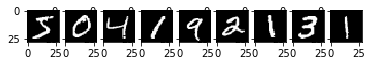

Labels: 5 0 4 1 9 2 1 3 1


In [4]:
# A plot of the first 9 images & labels in the training dataset
labels = []
for i in range(9):
    # add labels to list
    labels.append(y_train[i])
    # define subplot
    plt.subplot(191 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# print labels
# print('Labels:', labels)
print('Labels:', ' '.join(map(str,labels)))

### Reshaping and Normalising images

What we know about the dataset images:
* all images are centered
* each image only contains a hand-drawn digit
* all images have the same square size of 28×28 pixels
* all images are grayscale, anti-aliased

To be able to use the dataset in Keras API, the input shape has to be a 4D array(batch, height, width, channels. However, the MNIST dataset is 3D array. Therefore, each image needs to be reshaped and has to have a single color channel. Channels signify whether the image is grayscale or colored(1 for grayscale images, 3 for RGB images). 

The data are cast to type "float" to get decimal points after division, and the memory requirements can also be reduced by forcing the precision of the pixel values to be 32 bit. 

Normalising is always required in neural network models. It is done by by dividing each pixel value by 255(since RGB value can range from 0 to 255). This will rescale the pixel values of grayscale images to the range [0,1]. 

In [5]:
# image dimensions
img_rows, img_cols = 28, 28

# Reshaping the array to 4D(batch, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

# normalise inputs from 0-255 to 0-1
x_train/=255
x_test/=255

print('x_train shape:', x_train.shape)
print('Number of images in x_train:', x_train.shape[0])
print('Number of images in x_test:', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test: 10000


### One Hot Encode

One hot encoding is a representation of categorical variables as binary vectors. There are 10 classes and each class is mapped to unique integer ranged from 0 to 9. One hot encoding transforms the integers into a binary class matrix with a 1 for the index of the class value and 0 values for the rest of the classes. For example, the output 5 is represented as [0,0,0,0,0,1,0,0,0,0].

In [6]:
# categorising labels using one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

### Build Neural Network Model

Every Neural Network consists of 3 layers: input layer, hidden layer(s) and output layer. The hidden layers of a Convolutional Neural Network usually consist of convolutional layers, pooling layers, fully connected layers, dropout layers and flatten layers. The below model can be described as follows:

* The Sequential model is a linear stack of layers, so the layers can be described simply.
* The first hidden layer is a Convolutional layer with 32 filters of size 5 x 5 and the "relu" activation function. This input layer is expecting images with the structure of height, width and channels.
* The second layer is the MaxPooling layer. Its objective is to down-sample the input representation to allow the model  for assumptions to be made about features in order to reduce over-fitting, and reduce dimensionality which reduces the training time.
* The third and forth layers are again Convolutional layer(32 filters of size 3 x 3) and MaxPooling respectively.
* The fifth hidden layer is Dropout layer and it is configured to randomly drop 20% of neurons during the training process to reduce overfitting.
* The sixth is the Flatten layer. It flattens 2D arrays to 1D array before building the fully connected layers.
* The seventh layer is a fully connected layer with 128 neurons and the activation function.
* The last layer is a fully connected output layer with 10 neurons in order to predict the probability distribution of an image belonging to each of the 10 classes(0-9). The softmax activation is required to be used when dealing with classifying the data into a number of pre-decided classes.

In [8]:
# import all necessary libraries
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
# Create the model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(img_rows, img_cols, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

## References:
### Tensorflow: 

*https://www.tensorflow.org*

*https://en.wikipedia.org/wiki/TensorFlow*

*https://www.youtube.com/watch?v=2FmcHiLCwTU*

*https://www.youtube.com/watch?v=tXVNS-V39A0*

### Keras: 

*https://keras.io*

*https://en.wikipedia.org/wiki/Keras*

*https://www.i2tutorials.com/deep-learning-interview-questions-and-answers/what-is-the-difference-between-keras-and-tensorflow*

*https://www.infoworld.com/article/3336192/what-is-keras-the-deep-neural-network-api-explained.html*

### MNIST

*http://yann.lecun.com/exdb/mnist*

*https://en.wikipedia.org/wiki/MNIST_database*

*https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras*

*https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification*

### Matplotlib

*https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html*

*https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111*

### Machine Learning

*https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d*

*https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification*

*https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras*

*https://www.analyticsvidhya.com/blog/2017/05/25-must-know-terms-concepts-for-beginners-in-deep-learning*

*https://medium.com/@afozbek_/how-to-train-a-model-with-mnist-dataset-d79f8123ba84*

*https://keras.io/layers/convolutional*

*https://medium.com/coinmonks/handwritten-digit-prediction-using-convolutional-neural-networks-in-tensorflow-with-keras-and-live-5ebddf46dc8*

*https://medium.com/coinmonks/deploy-your-first-deep-learning-neural-network-model-using-flask-keras-tensorflow-in-python-f4bb7309fc49*

*https://medium.com/@ashok.tankala/build-the-mnist-model-with-your-own-handwritten-digits-using-tensorflow-keras-and-python-f8ec9f871fd3*

*https://www.sitepoint.com/keras-digit-recognition-tutorial*

*https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification*

*https://www.geeksforgeeks.org/activation-functions-neural-networks*

*https://elitedatascience.com/overfitting-in-machine-learning*

*https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python*

*https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras*

*https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220*

*https://medium.com/@ashok.tankala/building-digit-prediction-web-application-using-tensorflow-with-keras-and-flask-19f8bbdaec0b*

*https://towardsdatascience.com/writing-your-first-neural-net-in-less-than-30-lines-of-code-with-keras-18e160a35502*

*https://towardsdatascience.com/understanding-neural-networks-from-neuron-to-rnn-cnn-and-deep-learning-cd88e90e0a90*

*https://medium.com/@ashok.tankala/build-your-first-deep-learning-neural-network-model-using-keras-tensorflow-in-python-a3e76a6b3ccb*

*https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2*

